Привет! Меня зовут Исмаилов Исмаил, я буду проверять твой проект :) Можешь обращаться ко мне на «ты». Если тебе комфортно, то и я буду к тебе так обращаться, если нет, то обязательно скажи об этом.

Пожалуйста, не удаляй мои комментарии, которые я буду оставлять в работе. Это особенно поможет, если твои проекты будут отправлены на повторную проверку. При повторных проверках у комментариев будут приписки: "Вторая итерация", "Третья итерация" и т.д. 

Ты тоже можешь реагировать на мои комментарии, но в таком случае постарайся, чтобы твои комментарии отличались от моих: например, выделяй их своим любимым цветом — так у нас не возникнет путаницы :)

Кстати, про цвета! Мои комментарии будут в следующей цветовой гамме: зелеными, желтыми и красными. Например:

<div class="alert-success"> 
<b>Комментарий ревьюера 👍 </b>
    
В случае, если решение на отдельном шаге является полностью правильным. </div>

<div class="alert-warning"> 
<b>Комментарий ревьюера 💡</b> 
    
В случае, если решение может стать еще лучше с некоторыми корректировками </div>
 
<div class="alert-danger"> 
<b>Комментарий ревьюера ❌</b> 
    
В случае, если решение какого-то шага требует значительных изменений. Проект не может быть принят с первого раза, если ревью содержит комментарии, помеченные этим цветом </div>

# Сборный проект

## Введение

Целью исследования является определение закономерностей, влияющих на успешность игр и выявление потенциально наиболее популярных жанров и платформ на различных рынках в следующем году.

В качестве исходных данных используется информация по релизам игр до 2016 года, которая включает в себя:
* название игры;
* платформа;
* год выпуска;
* жанр;
* продажи в Северной Америке;
* продажи в Европе;
* продажи в Японии;
* продажи в прочих регионах;
* оценка критиков;
* оценка пользователей;
* рейтинг ESRB.
Продажи указаны в миллионах копий в год релиза. Оценки критиков и пользователей могут отсутствовать. Рейтинг ESRB - рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Для достижения цели исследования необходимо выполнить следующие задачи:
* подготовить данные;
* провести исследовательский анализ данных;
* составить портрет пользователя для различных регионов;
* поставить и проверить необходимые гипотезы.

## Подготовка данных

<div class="alert-danger"> 
<b>Комментарий ревьюера ❌</b> 
    
Нет необходимого вступления в проект: нужно рассказать, что за данные у тебя имеются, что вообще стоит делать, какие цели и задачи, что желаешь получить. Представь, что показываешь проект бизнесу / заказчику: заказчик не поймет даже, где оказался, потому что в проекте нет и названия, поэтому нужно стороннего читателя вводить в курс дела </div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

pd.options.mode.chained_assignment = None

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


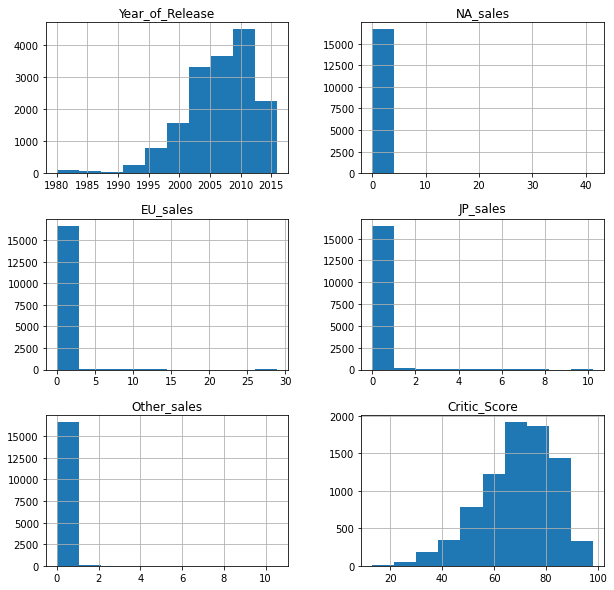

In [2]:
data = pd.read_csv('/datasets/games.csv')
display(data.head())
data.info()
data.hist(figsize=(10,10));

In [3]:
#data = data.rename(columns={'Name':'name',
#                    'Platform':'platform',
#                    'Year_of_Release':'year_of_release',
#                    'Genre':'genre',
#                    'NA_sales':'na_sales',
#                    'EU_sales':'eu_sales',
#                    'JP_sales':'jp_sales',
#                    'Other_sales':'other_sales',
#                    'Critic_Score':'critic_score',
#                    'User_Score':'user_score',
#                    'Rating':'rating'})

In [4]:
data.columns = data.columns.str.lower()

<div class="alert-warning"> 
<b>Комментарий ревьюера 💡</b> 
    
А если бы у тебя было сотни столбиков (что вполне возможно), то вручную писать совсем неоптимально. Это долго, повышает шанс ошибки и в целом - зачем писать самому, если есть Питон? Используй .str.lower

<div class="alert-info"> 
<b>Комментарий студента</b> 
    
Согласен, перевёл через .str.lower

In [5]:
#check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


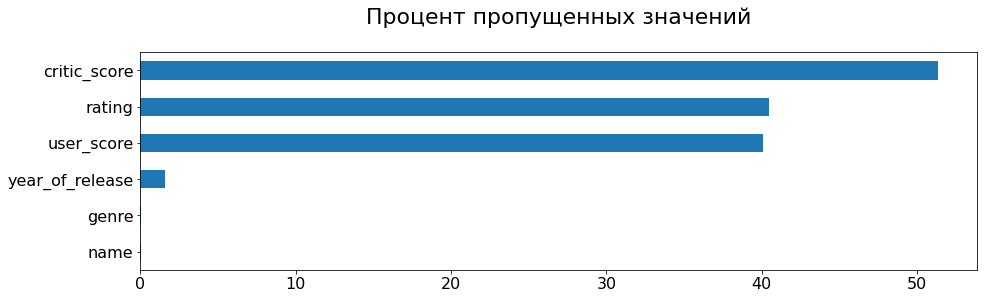

In [6]:
(
    (data.isna().mean()*100)
    .to_frame()
    .rename(columns = {0:'space'})
    .query('space > 0')
    .sort_values(by = 'space', ascending = True)
    .plot(kind= 'barh', figsize=(15,4), legend = False, fontsize = 16)
    .set_title('Процент пропущенных значений' + "\n", fontsize = 22, color = 'Black')
);

Из пропущенных значений удалим только строки без указания названия игры и года выпуска.\
Переведём столбец с годом выпуска в тип данных int - год не может быть дробным. Переводить в формат datetime особого смысла нет, так как присутствует только год.\
Пропущенные значения в оценках критиков и пользователей заполняем значением 'tbd' - 'to be detailed' ('подлежит уточнению').\
Пропущенные значения в рейтинге ESRB заполнеям значением 'unrated' - зона действия ESRB - Северная Америка, игры для других регионов могут не проходить оценку в ESRB, также как и некоторые игры, которые не будут продоваться на физических носителях - к примеру, в магазине цифровой дистрибьюции Steam рейтинг ESRB не требуется.

In [7]:
data.dropna(subset=['name', 'year_of_release'], inplace=True)
data['year_of_release'] = data['year_of_release'].astype('int')

data['critic_score'].fillna(value='tbd', inplace=True)
data['user_score'].fillna(value='tbd', inplace=True)
data['rating'].fillna(value='unrated', inplace=True)

<div class="alert-success"> 
<b>Комментарий ревьюера 👍 </b>

Да, не нужно бояться удалять данные, если от их удаления мы ничего не потеряем

In [8]:
#check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  object 
 9   user_score       16444 non-null  object 
 10  rating           16444 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 1.5+ MB


In [9]:
#data['worldwide_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data['worldwide_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

<div class="alert-success"> 
<b>Комментарий ревьюера 👍 </b>
    
Более изящная конструкция 

data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [10]:
#check
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  object 
 9   user_score       16444 non-null  object 
 10  rating           16444 non-null  object 
 11  worldwide_sales  16444 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 1.6+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,worldwide_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,tbd,tbd,unrated,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,tbd,tbd,unrated,31.38


## Исследовательский анализ данных

### Распределение игр по году выпуска

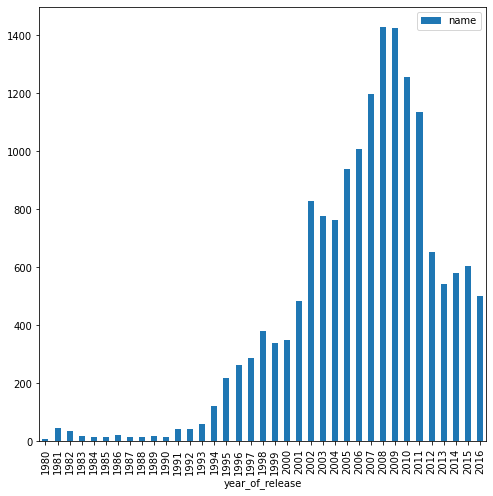

In [11]:
(
    data.pivot_table(index='year_of_release', values='name', aggfunc='count')
    .plot(kind='bar', figsize=(8,8))
);

До 1995 года выходило менее 200 игр в год. С 1995 до 2008 года идёт рост количества выпущенных игр. С 2009 до 2016 года идёт спад количества выпущенных игр.

### Распределение игр по платформам

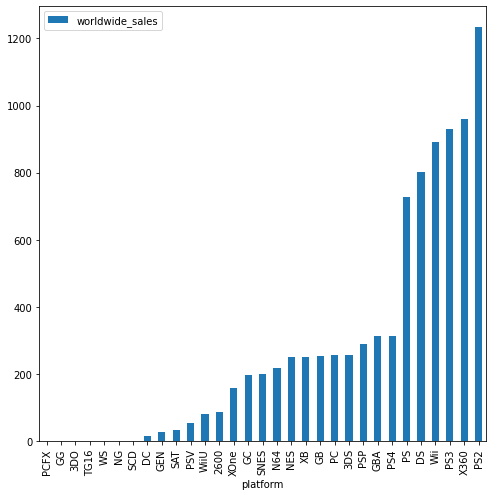

In [12]:
(
    data.pivot_table(index='platform', values='worldwide_sales', aggfunc='sum')
    .sort_values('worldwide_sales')
    .plot(kind='bar', figsize=(8,8))
);
#data['platform'].value_counts()

Платформы с наибольшими продажами:
* PS;
* DS;
* Wii;
* PS3;
* X360;
* PS2.

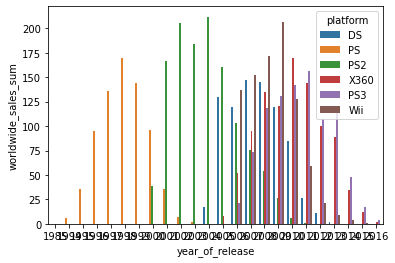

In [13]:
top_platforms = (
    data.query('platform in ["PS", "DS", "Wii", "PS3", "X360", "PS2"]')
    .pivot_table(index=['year_of_release', 'platform'], values='worldwide_sales', aggfunc='sum')
    .reset_index()
)


top_platforms.columns=['year_of_release', 'platform', 'worldwide_sales_sum']

ax = sns.barplot(x='year_of_release',
            y='worldwide_sales_sum',
            hue="platform",
            data=top_platforms)
#plt.rcParams['figure.figsize']=(15,10)

<Figure size 720x432 with 0 Axes>

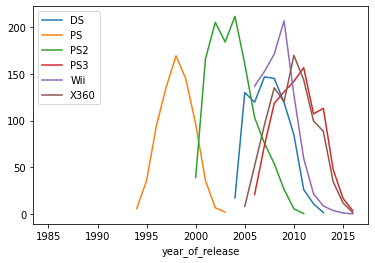

In [14]:
top_platform = data.query('platform==["PS2","X360","PS3","Wii","DS","PS"]')\
.pivot_table(index = 'year_of_release', columns ='platform',values='worldwide_sales',aggfunc='sum')
 
plt.figure(figsize=(10,6))
 
top_platform.plot() 
plt.legend()
plt.show()

На примере платформ с наибольшими суммарными продажими продолжительность "жизни" платформы:
* PS - 10 лет - с 1994 до 2003 года;
* PS2 - 12 лет - с 2000 до 2011 года;
* DS - 10 лет - с 2004 до 2013 года;
* X360 - 12 лет - с 2005 до 2016 года;
* PS3 - 11 лет - с 2006 до 2016 года;
* Wii - 11 лет - с 2006 до 2016 года.

При этом в последние годы продаж игр для PS2 и Wii продажи были единичными.

In [15]:
print(f'Средняя продолжительность "жизни" платформы: {round((10+12+10+12+11+11)/6)} лет')

Средняя продолжительность "жизни" платформы: 11 лет


### Выбор актуального периода

~~Исходя из полученного распределения количества игр по годам и средней продолжительности "жизни" платформы для дальнейшего исследования выбирем период с 2006 до 2016 года.\
Сохраним срез данных для дальнейшего исследования в переменную actual_data.~~

В качестве актуального периода возьмём данные с 2013 года - три полных года + неполный 2016 год.\
Сохраним срез данных для дальнейшего исследования в переменную actual_data.

In [16]:
actual_data = data.query('year_of_release >= 2013')

<div class="alert-danger"> 
<b>Комментарий ревьюера ❌</b>
Для целей прогнозирования продяаж на следующий год даже в традиционных бизнесах редко берут данные более чем за 2-3 года. А в такой динамично меняющейся индустрии, как компьютерные игры и вовсе не стоит брать слишком большой временной интервал - иначе обязательно захватишь уже отжившие тренды. Но и слишком короткий период тоже брать не стоит.

<div class="alert-info"> 
<b>Комментарий студента</b> 
    
Так как данные за 2016 год неполные, взял данные за последние три года + 2016 год. Также обе основных конкурирующих консоли - PS5 и XOne - вышли в 2013 году, для анализа основных конкурентов более старые данные не имеют смысла.

### Выбор потенциально прибыльных платформ

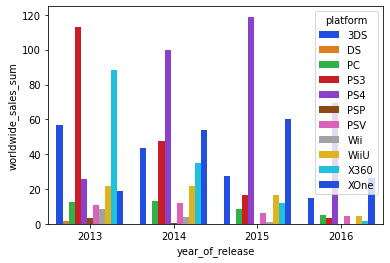

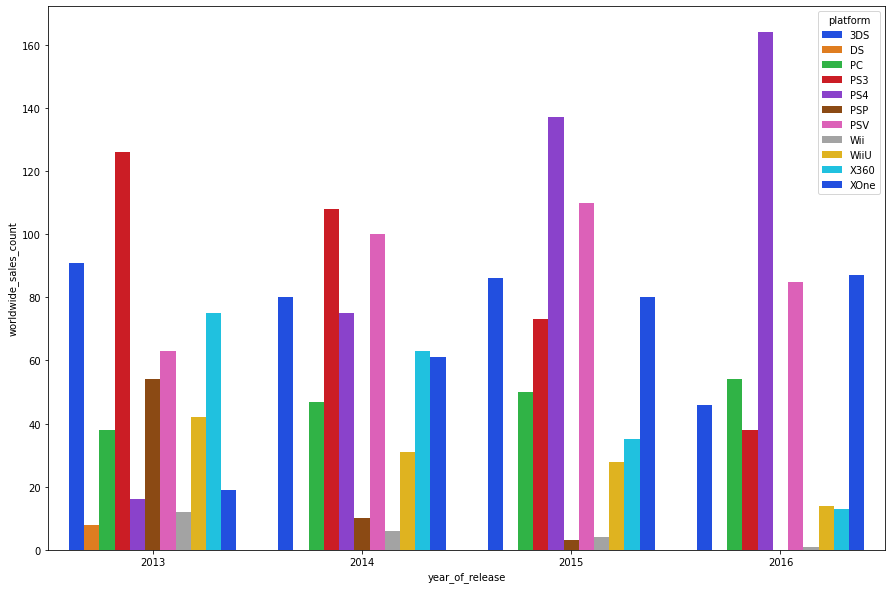

In [17]:
actual_platforms = (
    actual_data
    .pivot_table(index=['year_of_release', 'platform'], values='worldwide_sales', aggfunc=['count', 'sum'])
    .reset_index()
)


actual_platforms.columns=['year_of_release', 'platform', 'worldwide_sales_count', 'worldwide_sales_sum']

ax_sum = sns.barplot(x='year_of_release',
            y='worldwide_sales_sum',
            hue="platform",
            data=actual_platforms,
            palette='bright')
plt.rcParams['figure.figsize']=(15,10)
plt.show()
ax_count = sns.barplot(x='year_of_release',
            y='worldwide_sales_count',
            hue="platform",
            data=actual_platforms,
            palette='bright')
plt.rcParams['figure.figsize']=(15,10)

In [18]:
actual_data_2016 = (
    actual_data
    .query('year_of_release == 2016')
    .pivot_table(index='platform', values='worldwide_sales', aggfunc=['count', 'sum'])
)
actual_data_2016.columns=['count', 'sum']
display(actual_data_2016.sort_values('count', ascending=False))
display(actual_data_2016.sort_values('sum', ascending=False))

,count,sum
platform,,
PS4,164,69.25
XOne,87,26.15
PSV,85,4.25
PC,54,5.25
3DS,46,15.14
PS3,38,3.60
WiiU,14,4.60
X360,13,1.52
Wii,1,0.18


,count,sum
platform,,
PS4,164,69.25
XOne,87,26.15
3DS,46,15.14
PC,54,5.25
WiiU,14,4.60
PSV,85,4.25
PS3,38,3.60
X360,13,1.52
Wii,1,0.18


Актуальными консолями на 2016 год являются:
* PC,
* PS3,
* Wii,
* X360,
* 3DS,
* PSV
* WiiU,
* PS4,
* XOne.

Однако, основная масса продаж приходится на платформы 3DS, PS4 и XOne.

Продажи по всем платформам снижаются, что объясняется средним жизненным циклом - PS4 и XOne в 2016 были на 4 году своего жизненного цикла, 3DS - на 6 году.

В 2015-2016 годах на PS4 выходило примерно в два раза больше игр чем на XOne, количество игр на PS4 росло, а на XOne вышло на плато. Количество игр на 3DS с момента релиза консоли снижалось незначительно, 2016 год был первым годом значительного снижения релизов.

При этом, количество вышедших игр и их тираж на 3DS напрямую не влияет на тиражи игр на PS4 и XOne - PS4 и XOne являются прямыми конкурентами и влияют друг на друга, а 3DS является портативной консолью.

<div class="alert-success"> 
<b>Комментарий ревьюера 👍 </b>

Согласен с выбором платформ

### Анализ продаж игр на основных консолях

In [19]:
#actual_data.query('platform in ["PS4", "3DS", "XOne"]')['worldwide_sales']


display(actual_data.query('platform == "PS4"')['worldwide_sales'].describe())
display(actual_data.query('platform == "3DS"')['worldwide_sales'].describe())
display(actual_data.query('platform == "XOne"')['worldwide_sales'].describe())

count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: worldwide_sales, dtype: float64

count    303.000000
mean       0.472772
std        1.381347
min        0.010000
25%        0.040000
50%        0.090000
75%        0.280000
max       14.600000
Name: worldwide_sales, dtype: float64

count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: worldwide_sales, dtype: float64

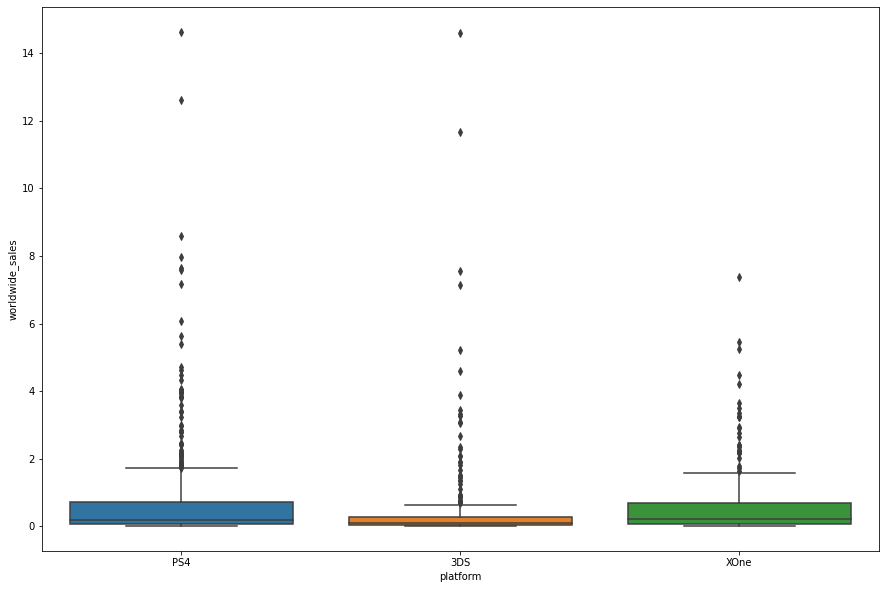

In [20]:
ax = sns.boxplot(x='platform', 
                 y='worldwide_sales', 
                 data=actual_data.query('platform in ["PS4", "XOne", "3DS"]'))

Для PS4 медианный общий тираж игр в год релиза - 0.20 миллиона копий; самый большой тираж в год релиза - 14.63 миллиона копий.\
Игры с тиражами более 5 миллионов копий в год релиза - единичные, можно считать их хитами.

Для 3DS медианный общий тираж игр в год релиза - 0.12 миллиона копий; самый большой тираж в год релиза - 14.60 миллиона копий.\
Игры с тиражами более 4 миллионов копий в год релиза - единичные, можно считать их хитами.

Для XOne медианный общий тираж игр в год релиза - 0.22 миллиона копий; самый большой тираж в год релиза - 7.39 миллиона копий.\
Игры с тиражами более 3.5 миллионов копий в год релиза - единичные, можно считать их хитами.

Построим график повторно без учёта игр-"хитов".

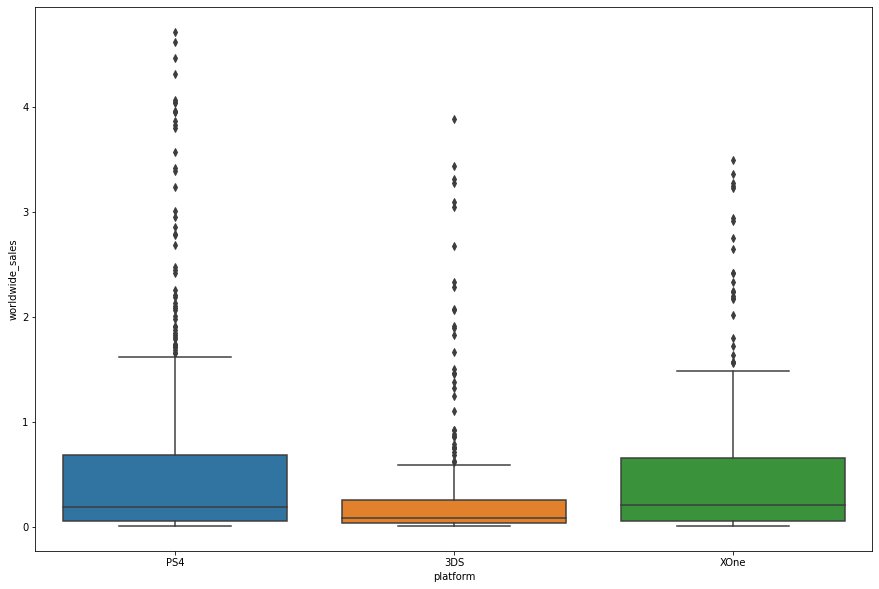

In [21]:
ax = sns.boxplot(x='platform', 
                 y='worldwide_sales', 
                 data=actual_data.query('(platform == "PS4" and worldwide_sales <= 5) or\
                                         (platform == "3DS" and worldwide_sales <= 4) or\
                                         (platform == "XOne" and worldwide_sales <= 3.5)'))

Исходя из динамики количества игровых релизов на платформы PS4 и XOne можно предположить, что в 2017 году количество игр на PS4 также будет больше, чем на XOne. При этом, учитывая примерно одинаковое распределение тиражей игр на PS4 и XOne можно сказать, что наиболее прибыльной и популярной стационарной игровой платформой будет PS4.

3DS, как не составляющая им прямой конкуренции портативная консоль, имеет меньшие тиражи игр, но и количество релизов на этой консоли снижается не так резко, как на стационарных консолях. При этом возможен релиз новой портативной консоли Нинтендо в следующем 2017 году.

Для дальнейшего рассмотрения выберем консоль PS4 - как потенциально наиболее популярную консоль в следующем (2017) году.

<div class="alert-warning"> 
<b>Комментарий ревьюера 💡</b> 
     
Стоит сузить боксплот, посмотреть на него без выбросов, ибо сейчас плохо видно

<div class="alert-info"> 
<b>Комментарий студента</b> 
    
Построил повторно график боксплота - выкинул из выборки часть игр с выбивающимися тиражами.

### Влияние отзывов пользователей и критиков на продажи на примере консоли PS4

Для анализа влияния отзывов критиков и пользователей возьмём срез данных со следующими условиями - платформа PS4, отзывы критиков и пользователей - не "tbd", а также дополнительно поменяем тип данных - столбец с отзывами критиков на int, с отзывами пользователей на float.

In [22]:
ps4_actual = actual_data.query('platform == "PS4" and critic_score != "tbd" and user_score != "tbd"')
ps4_actual['critic_score'] = ps4_actual['critic_score'].astype('int')
ps4_actual['user_score'] = ps4_actual['user_score'].astype('float')
ps4_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249 entries, 42 to 16530
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             249 non-null    object 
 1   platform         249 non-null    object 
 2   year_of_release  249 non-null    int64  
 3   genre            249 non-null    object 
 4   na_sales         249 non-null    float64
 5   eu_sales         249 non-null    float64
 6   jp_sales         249 non-null    float64
 7   other_sales      249 non-null    float64
 8   critic_score     249 non-null    int64  
 9   user_score       249 non-null    float64
 10  rating           249 non-null    object 
 11  worldwide_sales  249 non-null    float64
dtypes: float64(6), int64(2), object(4)
memory usage: 25.3+ KB


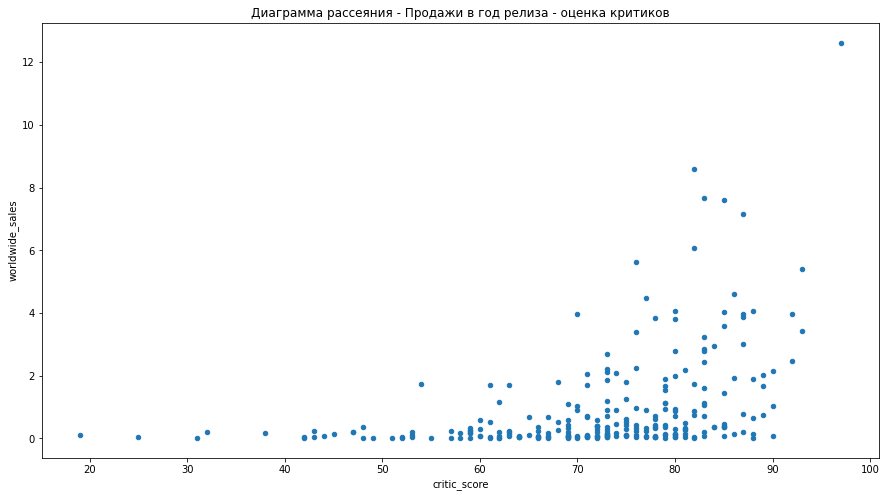

Корреляция продаж в год релиза и оценки критиков 0.4059


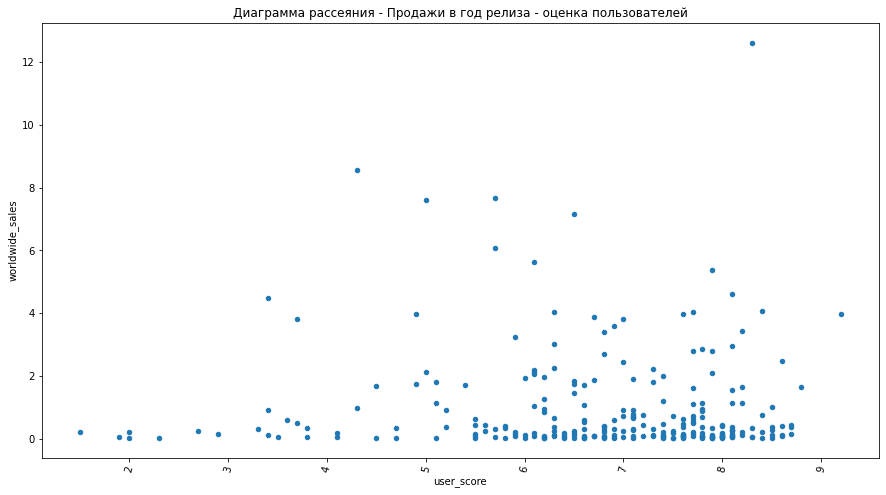

Корреляция продаж в год релиза и оценки пользователей -0.0336


In [23]:
(
    ps4_actual.plot(kind='scatter', 
               y='worldwide_sales',
               x='critic_score',
               figsize=(15,8))
)
plt.title('Диаграмма рассеяния - Продажи в год релиза - оценка критиков')
plt.show()
print('Корреляция продаж в год релиза и оценки критиков', 
     ps4_actual['critic_score'].corr(ps4_actual['worldwide_sales']).round(4))

(
    ps4_actual.sort_values('user_score')
              .plot(kind='scatter', 
               y='worldwide_sales',
               x='user_score',
               figsize=(15,8),
               rot = 75)
)
plt.title('Диаграмма рассеяния - Продажи в год релиза - оценка пользователей')
plt.show()
print('Корреляция продаж в год релиза и оценки пользователей', 
     ps4_actual['user_score'].corr(ps4_actual['worldwide_sales']).round(4));

Корреляция между отзывами и тиражём игр на PS4 в год релиза отсутствует. Это может быть связанно с тем, что в основном продажи в год релиза зависят от рекламной кампании до релиза игры, а отзывы в любом случае появляются после релиза.

### Влияние отзывов пользователей и критиков на продажи игр на консолях 3DS и XOne

In [24]:
threeds_actual = actual_data.query('platform == "3DS" and critic_score != "tbd" and user_score != "tbd"')
threeds_actual['critic_score'] = threeds_actual['critic_score'].astype('int')
threeds_actual['user_score'] = threeds_actual['user_score'].astype('float')
threeds_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 235 to 16143
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             67 non-null     object 
 1   platform         67 non-null     object 
 2   year_of_release  67 non-null     int64  
 3   genre            67 non-null     object 
 4   na_sales         67 non-null     float64
 5   eu_sales         67 non-null     float64
 6   jp_sales         67 non-null     float64
 7   other_sales      67 non-null     float64
 8   critic_score     67 non-null     int64  
 9   user_score       67 non-null     float64
 10  rating           67 non-null     object 
 11  worldwide_sales  67 non-null     float64
dtypes: float64(6), int64(2), object(4)
memory usage: 6.8+ KB


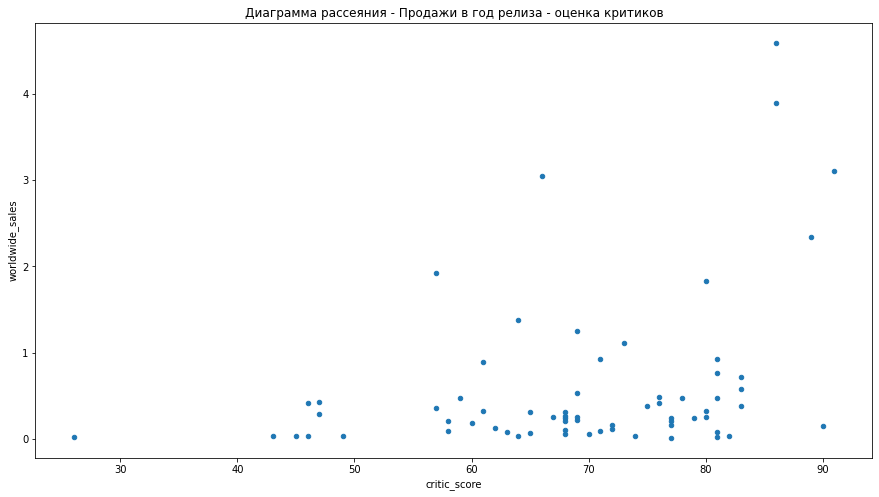

Корреляция продаж в год релиза и оценки критиков 0.3392


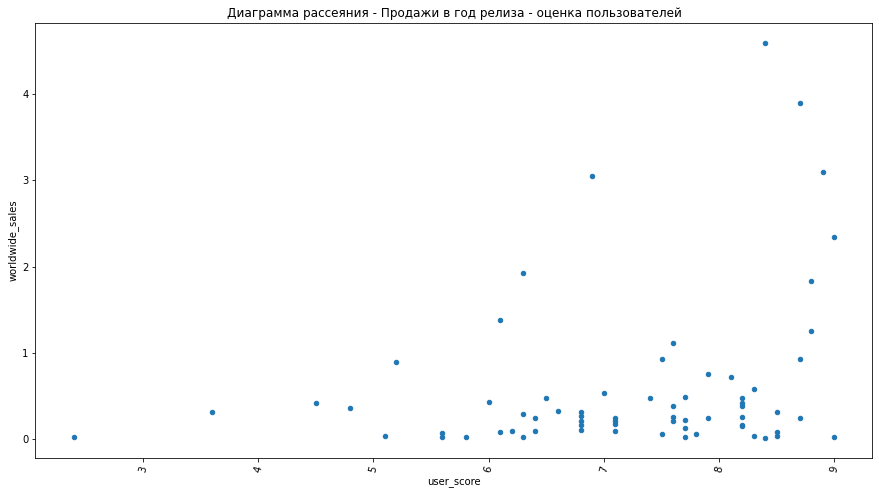

Корреляция продаж в год релиза и оценки пользователей 0.273


In [25]:
(
    threeds_actual.plot(kind='scatter', 
               y='worldwide_sales',
               x='critic_score',
               figsize=(15,8))
)
plt.title('Диаграмма рассеяния - Продажи в год релиза - оценка критиков')
plt.show()
print('Корреляция продаж в год релиза и оценки критиков', 
     threeds_actual['critic_score'].corr(threeds_actual['worldwide_sales']).round(4))

(
    threeds_actual.sort_values('user_score')
              .plot(kind='scatter', 
               y='worldwide_sales',
               x='user_score',
               figsize=(15,8),
               rot = 75)
)
plt.title('Диаграмма рассеяния - Продажи в год релиза - оценка пользователей')
plt.show()
print('Корреляция продаж в год релиза и оценки пользователей', 
     threeds_actual['user_score'].corr(threeds_actual['worldwide_sales']).round(4));

Корреляция между отзывами и тиражём игр на 3DS в год релиза отсутствует. Это может быть связанно с тем, что в основном продажи в год релиза зависят от рекламной кампании до релиза игры, а отзывы в любом случае появляются после релиза.

In [26]:
xone_actual = actual_data.query('platform == "XOne" and critic_score != "tbd" and user_score != "tbd"')
xone_actual['critic_score'] = xone_actual['critic_score'].astype('int')
xone_actual['user_score'] = xone_actual['user_score'].astype('float')
xone_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165 entries, 165 to 16660
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             165 non-null    object 
 1   platform         165 non-null    object 
 2   year_of_release  165 non-null    int64  
 3   genre            165 non-null    object 
 4   na_sales         165 non-null    float64
 5   eu_sales         165 non-null    float64
 6   jp_sales         165 non-null    float64
 7   other_sales      165 non-null    float64
 8   critic_score     165 non-null    int64  
 9   user_score       165 non-null    float64
 10  rating           165 non-null    object 
 11  worldwide_sales  165 non-null    float64
dtypes: float64(6), int64(2), object(4)
memory usage: 16.8+ KB


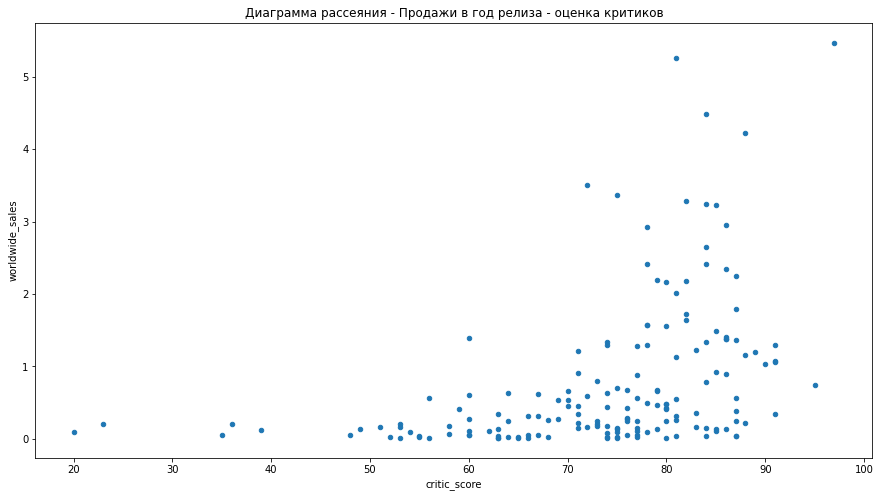

Корреляция продаж в год релиза и оценки критиков 0.4104


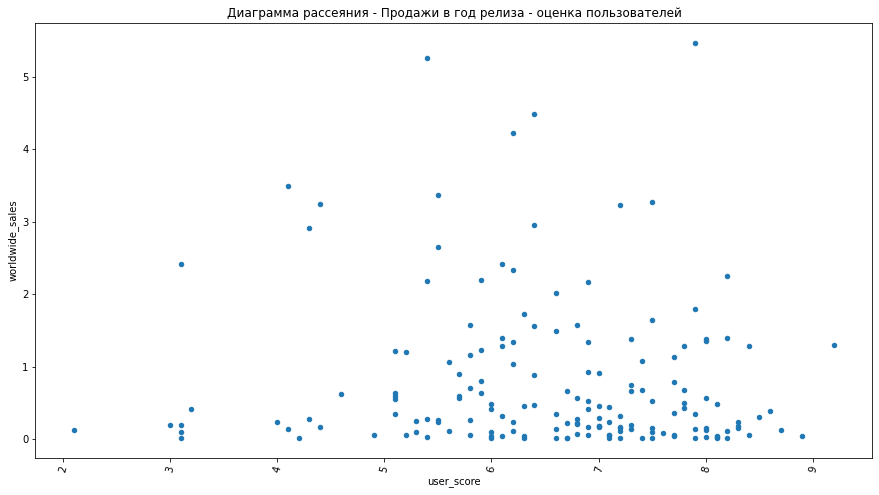

Корреляция продаж в год релиза и оценки пользователей -0.094


In [27]:
(
    xone_actual.plot(kind='scatter', 
               y='worldwide_sales',
               x='critic_score',
               figsize=(15,8))
)
plt.title('Диаграмма рассеяния - Продажи в год релиза - оценка критиков')
plt.show()
print('Корреляция продаж в год релиза и оценки критиков', 
     xone_actual['critic_score'].corr(xone_actual['worldwide_sales']).round(4))

(
    xone_actual.sort_values('user_score')
              .plot(kind='scatter', 
               y='worldwide_sales',
               x='user_score',
               figsize=(15,8),
               rot = 75)
)
plt.title('Диаграмма рассеяния - Продажи в год релиза - оценка пользователей')
plt.show()
print('Корреляция продаж в год релиза и оценки пользователей', 
     xone_actual['user_score'].corr(xone_actual['worldwide_sales']).round(4));

Корреляция между отзывами и тиражём игр на XOne в год релиза отсутствует. Это может быть связанно с тем, что в основном продажи в год релиза зависят от рекламной кампании до релиза игры, а отзывы в любом случае появляются после релиза.

<div class="alert-success"> 
<b>Комментарий ревьюера 👍 </b>

Хорошие диаграммы рассеивания. Корреляция тоже подсчитана верно

### Распределение игр по жанрам

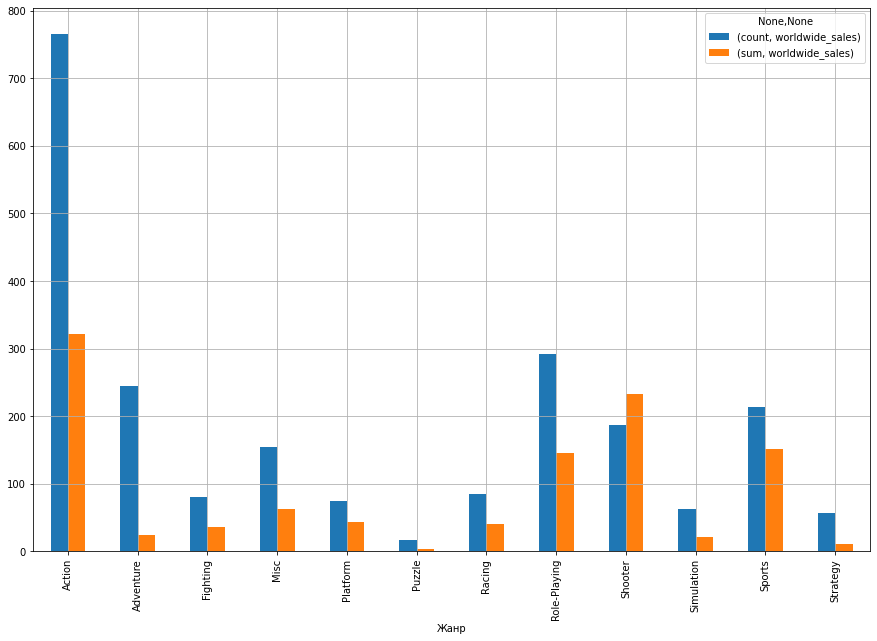

In [28]:
(
    actual_data.pivot_table(index='genre', values='worldwide_sales', aggfunc=['count', 'sum'])
    .plot(kind='bar', xlabel='Жанр', grid=True)
);

~~За 2006-2016 года больше всего было продано игр жанра Action, но и количество выпущенных игр этого жанра также самое большое.\
Меньше всего продано игр жанров Puzzle и Strategy.\
При этом игры жанра Shooter имеют отношение продаж к количеству игр близкое в среднем к одному миллиону проданых копий на один релиз.~~

За 2013-2016 года больше всего было продано игр жанра Action, но и количество выпущенных игр этого жанра также самое большое.
Меньше всего продано игр жанров Puzzle и Strategy.
При этом игры жанра Shooter имеют в среднем отношение продаж к количеству игр больше чем один миллион проданых копий на один релиз.

<div class="alert-success"> 
<b>Комментарий ревьюера 👍 </b>

Здорово, что обратил внимание на средние продажи

<div class="alert-info"> 
<b>Комментарий студента</b>

Чуть поправил вывод - это связанно с изменением актуального периода. Впрочем, общая картина изменилась не сильно - за исключением ещё более высокого среднего отношения проданных копий на один релиз у игр жанра Shooter.

## Портрет пользователя региона

          na_sales
platform          
PS4         108.74
XOne         93.12
X360         81.66
PS3          63.50
3DS          38.20
          eu_sales
platform          
PS4         141.09
PS3          67.81
XOne         51.59
X360         42.52
3DS          30.96
          jp_sales
platform          
3DS          67.81
PS3          23.35
PSV          18.59
PS4          15.96
WiiU         10.88


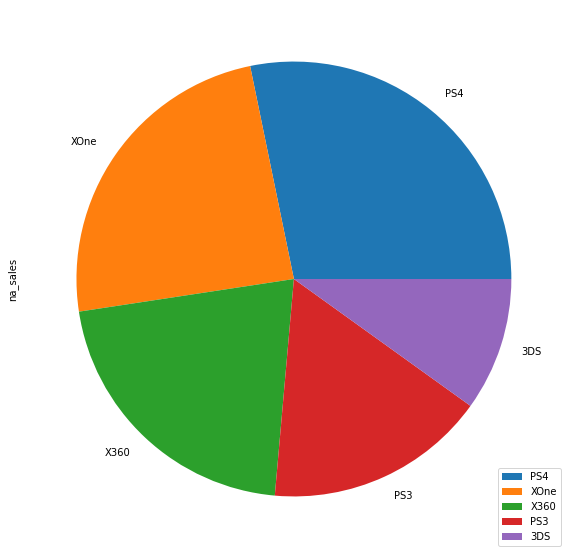

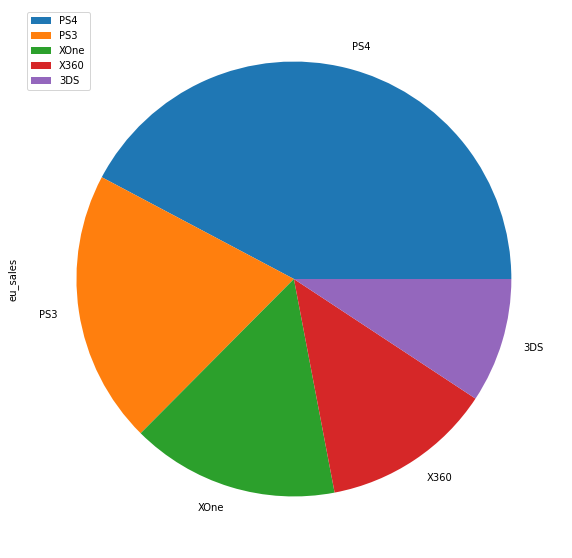

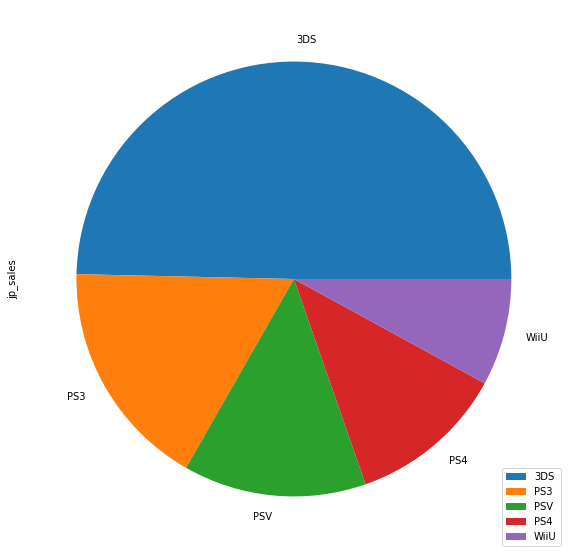

In [29]:
for i in ['na_sales', 'eu_sales', 'jp_sales']:
    print(
        actual_data.pivot_table(index='platform', values=i, aggfunc='sum')
        .sort_values(i, ascending=False)
        .head()
    )
    (
        actual_data.pivot_table(index='platform', values=i, aggfunc='sum')
        .sort_values(i, ascending=False)
        .head()
    ).plot(subplots=True, kind='pie')

За последние десять лет топ-5 платформ по регионам по общим тиражам игр в год релиза:
* Северная Америка:
    * PS4;
    * XOne;
    * X360;
    * PS3;
    * 3DS.
* Европа:
    * PS4;
    * PS3;
    * XOne;
    * X360;
    * 3DS.
* Япония:
    * 3DS;
    * PS3;
    * PSV;
    * PS4;
    * WiiU.

              na_sales
genre                 
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
              eu_sales
genre                 
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
              jp_sales
genre                 
Role-Playing     51.04
Action           40.49
Misc              9.20
Fighting          7.65
Shooter           6.61


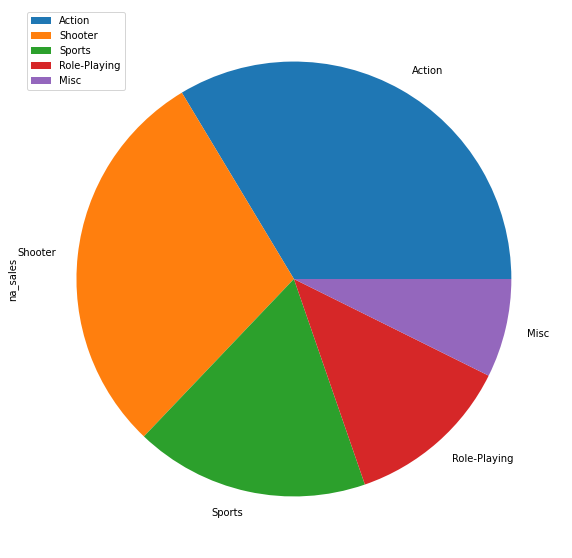

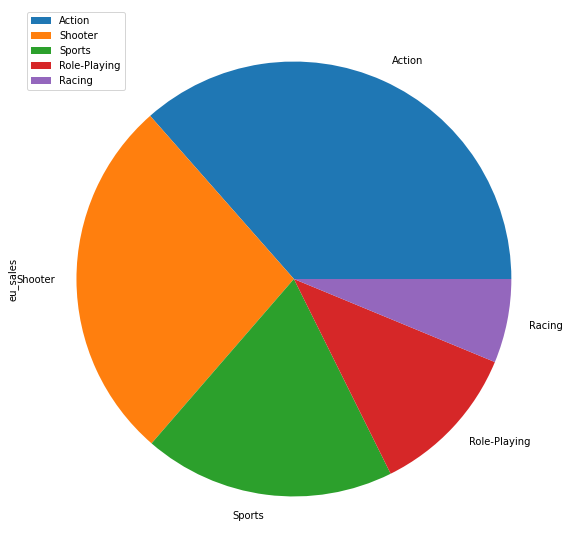

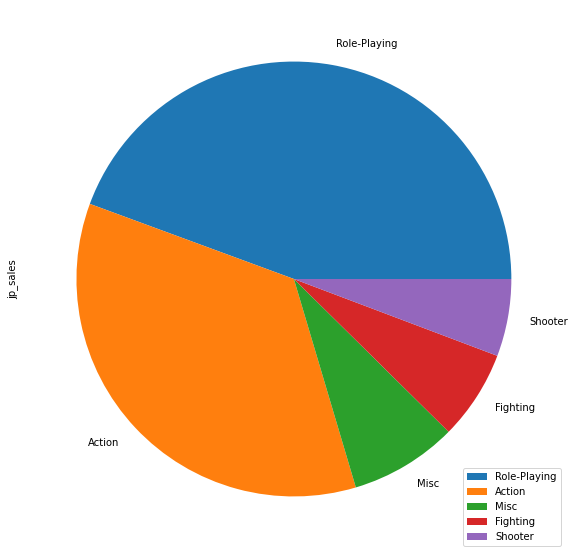

In [30]:
for i in ['na_sales', 'eu_sales', 'jp_sales']:
    print(
        actual_data.pivot_table(index='genre', values=i, aggfunc='sum')
        .sort_values(i, ascending=False)
        .head()
    )
    (
        actual_data.pivot_table(index='genre', values=i, aggfunc='sum')
        .sort_values(i, ascending=False)
        .head()
    ).plot(subplots=True, kind='pie')

За последние десять лет топ-5 жанров по регионам по общим тиражам игр в год релиза:

* Северная Америка:
    * Action;
    * Shooter;
    * Sports;
    * Role-Playing;
    * Misc.
* Европа:
    * Action;
    * Shooter;
    * Sports;
    * Role-Playing;
    * Racing.
* Япония:
    * Role-Playing;
    * Action;
    * Misc;
    * Fighting;
    * Shooter.

In [31]:
#actual_data.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'sum').plot(kind='bar');

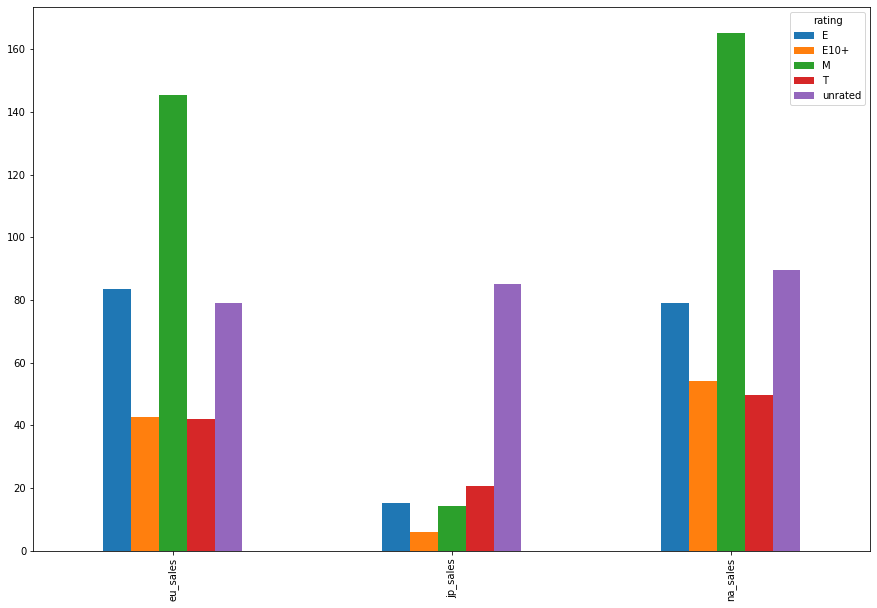

In [32]:
actual_data.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'sum').T.plot.bar();

В Европе больше продаются игры с рейтингами ESRB - E и M.\
В Японии игры продаются без характерного влияния ESRB.
В Северной Америке больше продаются игры с рейтингами ESRB - E и M.\
Также во всех регионах примерно одинаково продаются игры, не проходящие оценку в ESRB.

При этом нужно принимать во внимание, что рейтинг ESRB действует в Северной Америке - в Европе есть свой рейтинг PEGI, в Японии - CERO. В частности, в Японии следят именно за соблюдением национального рейтинга, что объясняет низкое влияния рейтинга ESRB на продажи в этом регионе.

<div class="alert-danger"> 
<b>Комментарий ревьюера ❌</b> 

В последнем графике ты посмотрел разбиение не по стране, а по рейтнингу - это неверно

<div class="alert-info"> 
<b>Комментарий студента</b> 

Изменил последний график - поменял разбиение, сделал по странам

## Проверка гипотез

При проверке гипотез мы будем использовать все данные, доступные в актуальный период - то есть, нам будут доступны генеральные совокупности, также совокупности являются независимыми - они не пересекаются. Соответственно, в ходе проверки будем использовать **гипотезу о равенстве средних двух генеральных совокупностей**. Так как нам не важно, какое именно отклонение присутствует или отсутствует (т.е. нам не важно, результат больше или меньше) то гипотезы проверяем как двусторонние. 

### Гипотеза 1 - средние пользовательские рейтинги платформ PC и XOne одинаковые

Нулевая гипотеза - средние пользовательские рейтинги платформ PC и XOne одинаковые.\
Альтернативная гипотеза - средние пользовательские рейтинги платформ PC и XOne не одинаковые.\
alpha = 0.05\
Так как выборки не равные используем параметр equal_var=False.

In [33]:
pc_actual = actual_data.query('platform == "PC" and user_score != "tbd"')
pc_actual['user_score'] = pc_actual['user_score'].astype('float')
pc_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 458 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             155 non-null    object 
 1   platform         155 non-null    object 
 2   year_of_release  155 non-null    int64  
 3   genre            155 non-null    object 
 4   na_sales         155 non-null    float64
 5   eu_sales         155 non-null    float64
 6   jp_sales         155 non-null    float64
 7   other_sales      155 non-null    float64
 8   critic_score     155 non-null    object 
 9   user_score       155 non-null    float64
 10  rating           155 non-null    object 
 11  worldwide_sales  155 non-null    float64
dtypes: float64(6), int64(1), object(5)
memory usage: 15.7+ KB


In [34]:
results = st.ttest_ind(pc_actual['user_score'],
                       xone_actual['user_score'],
                       equal_var=False)
alpha = .05
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.12511463063961994
Не получилось отвергнуть нулевую гипотезу


Гипотеза подтверждена - средние пользовательские рейтинги платформ PC и XOne одинаковые.

### Гипотеза 2 - средние пользовательские рейтинги жанров Action и Sports разные.

Нулевая гипотеза - средние пользовательские рейтинги жанров Action и Sports одинаковые.\
Альтернативная гипотеза - средние пользовательские рейтинги жанров Action и Sports не одинаковые.\
alpha = 0.05\
Так как выборки не равные используем параметр equal_var=False.

In [35]:
action_sport_data = actual_data.query('(genre == "Action" or genre == "Sports") and user_score != "tbd"')
action_sport_data['user_score'] = action_sport_data['user_score'].astype('float')
action_sport_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 549 entries, 16 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             549 non-null    object 
 1   platform         549 non-null    object 
 2   year_of_release  549 non-null    int64  
 3   genre            549 non-null    object 
 4   na_sales         549 non-null    float64
 5   eu_sales         549 non-null    float64
 6   jp_sales         549 non-null    float64
 7   other_sales      549 non-null    float64
 8   critic_score     549 non-null    object 
 9   user_score       549 non-null    float64
 10  rating           549 non-null    object 
 11  worldwide_sales  549 non-null    float64
dtypes: float64(6), int64(1), object(5)
memory usage: 55.8+ KB


In [36]:
results = st.ttest_ind(action_sport_data.loc[action_sport_data['genre'] == "Action", 'user_score'],
                       action_sport_data.loc[action_sport_data['genre'] == "Sports", 'user_score'],
                       equal_var=False)
alpha = .05
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.4460039700704315e-20
Отвергаем нулевую гипотезу


Гипотеза подтверждена - средние пользовательские рейтинги жанров Action и Sports разные.

<div class="alert-danger"> 
<b>Комментарий ревьюера ❌</b> 

Ничего не сказано про выбранный статистический критерий (тест). Нужно назвать его и сказать, почему в твоем проекте используется именно такой

<div class="alert-info"> 
<b>Комментарий студента</b> 

Указал о выборе гипотезы равенства средних двух генеральных совокупностей.\
Также из-за изменения актуального периода изменился результат проверки первой гипотезы.

## Вывод

### Подготовка данных

В ходе подготовки данных были удалены строки без названия игр и года релиза, заполнены пропуски в рейтингах значением 'tbd', изменён тип данных столбца с годами на int.

### Исследовательский анализ данных

В ходе анализа данных были исследованны распределения игр по годам выпуска и по платформам. На основании этих данных был выбран актуальный период (жизненный цикл консоли) - 10 лет. На основании данных актуального периода были выбраны три потенциально прибыльных консоли на следующий - 2017 - год: PS4, XOne и 3DS. Для выбранных консолей был проведён анализ продаж игр в год релиза и из трёх консолей выбрана наиболее потенциально прибыльная - PS4. Также выяснено, что ни оценки пользователей, ни оценки критиков не оказывают значительного влияния на продажи игр в год релиза и иссоедовано распределение количества игр и общих продаж в год релиза.

### Портрет пользователей разных регионов

Для трёх основных регионов продаж - Северная Америка, Европа и Япония - были найдены топ-5 самых популярных жанров и самых популярный консолей на основе суммарных продаж в соответсвующих регионах за последние 10 лет. Также оценено влияние рейтинга ESRB на популярность игр в соответствующих регионах.

### Проверка гипотез

Перед исследованием было поставлено две гипотезы, которые проверялись как двусторонние с помощью t-теста:
* Гипотеза 1 - средние пользовательские рейтинги платформ PC и XOne одинаковые - подтверждена;
* Гипотеза 2 - средние пользовательские рейтинги жанров Action и Sports разные - подтверждена.

### Рекомендации

К повторному анализу рекомендуется проверка влияния рейтинга на популярность игр - в исходных данных рейтинг дан только по системе ESRB - эта система актуальна только для рынка Северной Америки.

<div class="alert-success"> 
<b>Комментарий ревьюера 👍 </b>

Отличный общий вывод! Нечего добавить :)

<div class="alert-danger"> 
<b>Комментарий ревьюера ❌</b> 
    
Отличный проект, тобою проделана большая работа, ты молодец!

Сперва похвалю за наличие везде промежуточных выводов, комментариев и рассуждений. Также очень хорошее оформление проекта. Сделано все именно так, как требуется. По коду вопросов тоже практически нет, в том числе у тебя хорошие графики и визуализация данных. 

Что обязательно стоит доработать: написать, какой статистический критерий для проверки гипотез был выбран и почему именно он; доработать пункт составления портретов пользователей; изменить актуальный срок для прогнозирования

Также я оставил несколько желтых комментариев. Думаю, и они будут тебе полезны.

Буду ждать доработок :) Удачи!

<div class="alert-success"> 
<b>Комментарий ревьюера 👍 Вторая итерация </b>

Все ошибки исправлены, проект стал еще лучше, принимаю. Успехов в дальнейшей учебе!